<a href="https://colab.research.google.com/github/joaomerjam/ECON3916-33674-Statistical-Machine-Learning/blob/main/Lab4/Class_4_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [8]:
# ingest data
data = fetch_california_housing(as_frame=True)
df = data.frame
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64


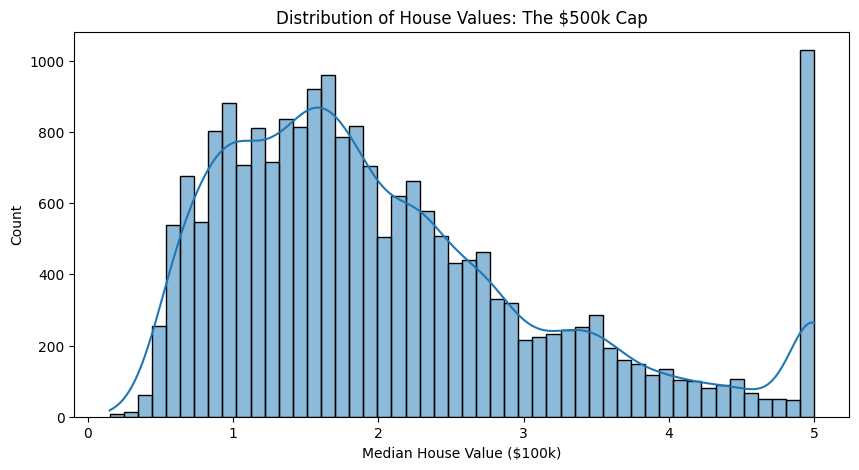

In [15]:

# inspecting the ceiling effect
print(df['MedHouseVal'].describe())

plt.figure(figsize=(10, 5))
sns.histplot(df['MedHouseVal'], bins=50, kde=True)
plt.title("Distribution of House Values: The $500k Cap")
plt.xlabel("Median House Value ($100k)")
plt.show()

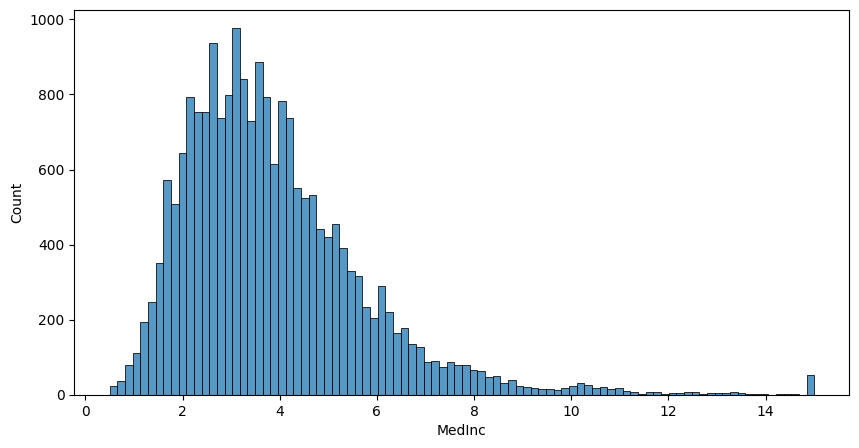

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df['MedInc'])
plt.show()

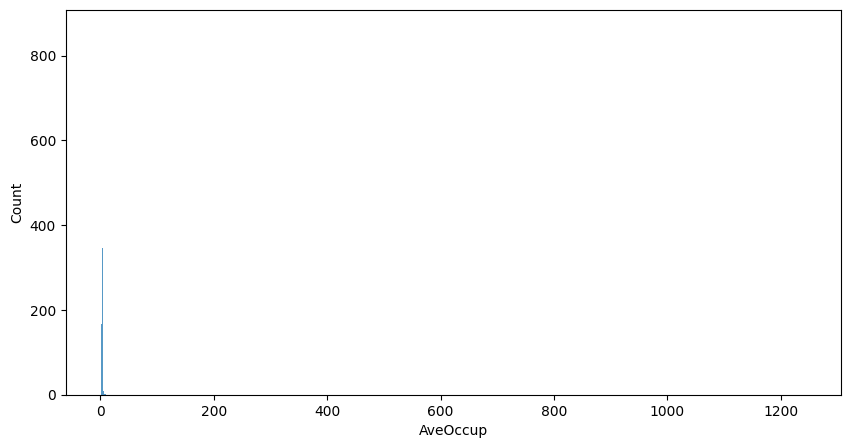

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(df['AveOccup'], bins=1)
plt.show()

In [19]:
from numpy._core.defchararray import lower
def falg_outliers_iqr(df,column):
  # quartiles
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  # define "Turkey Fence"
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # return boolean mask
  return (df[column] < lower_bound) | (df[column] > upper_bound)

# median income
df['outlier_iqr'] = flag_outliers_iqr(df, 'MedInc')

print(f"Manual Outliers Detected: {df['outlier_iqr'].sum()}")
print("These are primarily the 'Wealthy' districts.")

Manual Outliers Detected: 681
These are primarily the 'Wealthy' districts.


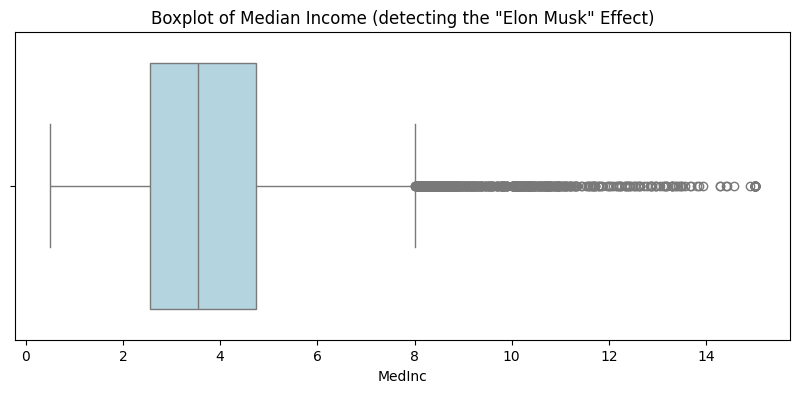

In [21]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['MedInc'], color="lightblue")
plt.title('Boxplot of Median Income (detecting the "Elon Musk" Effect)')
plt.show()

In [22]:
# Initialize the model
# contamination=0.05: We estimate ~5% of the data is anomalous
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Features to analyze (Income, House Age, Average Rooms)
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population']

# Fit and Predict (-1 = Outlier, 1 = Normal)
preds = iso_forest.fit_predict(df[features])

# Map to boolean (True if outlier)
df['outlier_iso'] = preds == -1

print(f"Algorithmic Outliers Detected: {df['outlier_iso'].sum()}")

Algorithmic Outliers Detected: 1032


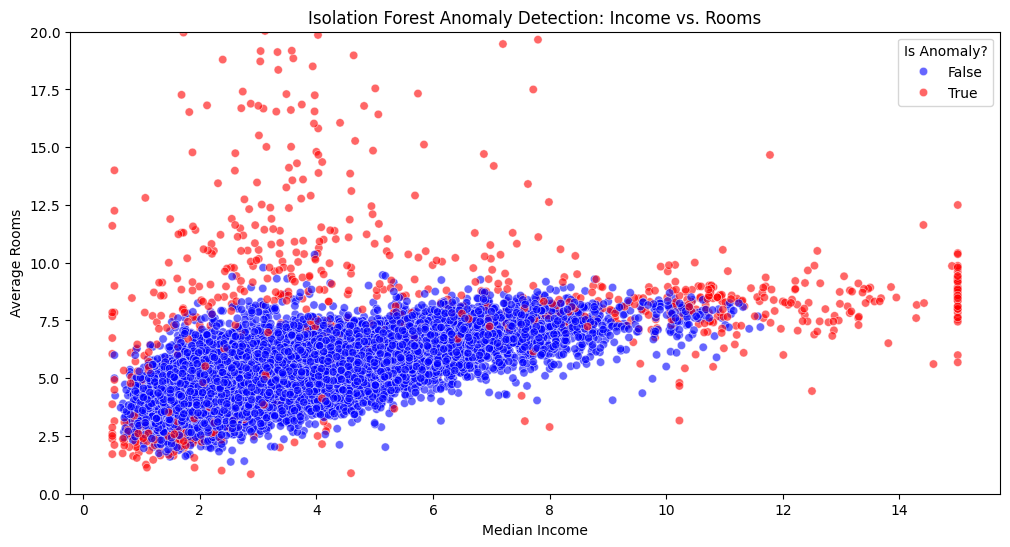

In [23]:
plt.figure(figsize=(12, 6))

# Plot points flagged by Isolation Forest
sns.scatterplot(
    data=df,
    x='MedInc',
    y='AveRooms',
    hue='outlier_iso',
    palette={True: 'red', False: 'blue'},
    alpha=0.6
)

plt.title("Isolation Forest Anomaly Detection: Income vs. Rooms")
plt.xlabel("Median Income")
plt.ylabel("Average Rooms")
plt.ylim(0, 20) # Zoom in to ignore extreme errors
plt.legend(title='Is Anomaly?')
plt.show()

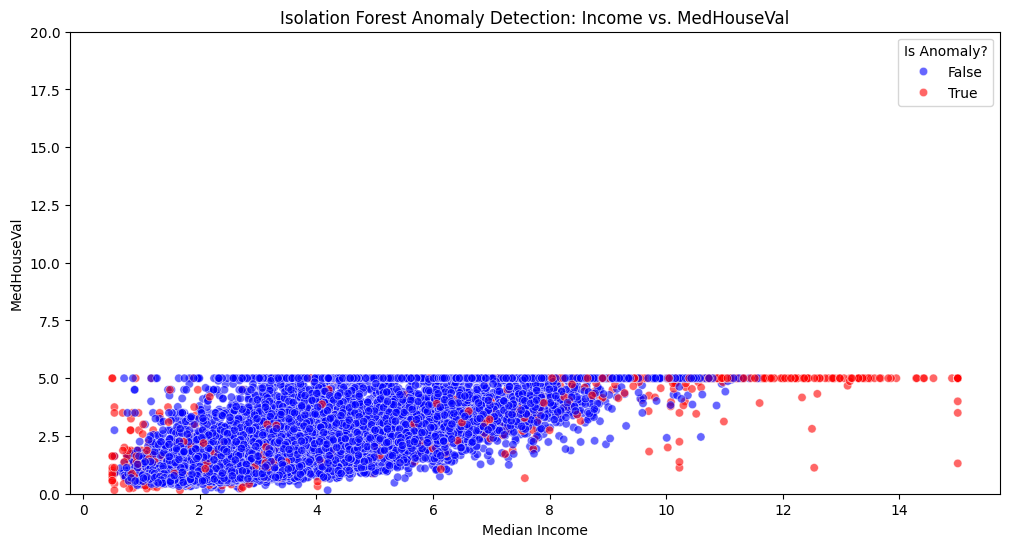

In [24]:
plt.figure(figsize=(12, 6))

# Plot points flagged by Isolation Forest
sns.scatterplot(
    data=df,
    x='MedInc',
    y='MedHouseVal',
    hue='outlier_iso',
    palette={True: 'red', False: 'blue'},
    alpha=0.6
)

plt.title("Isolation Forest Anomaly Detection: Income vs. MedHouseVal")
plt.xlabel("Median Income")
plt.ylabel("MedHouseVal")
plt.ylim(0, 20) # Zoom in to ignore extreme errors
plt.legend(title='Is Anomaly?')
plt.show()

In [25]:
# graph is odd bc the price is capped at $500k for the price of the houses

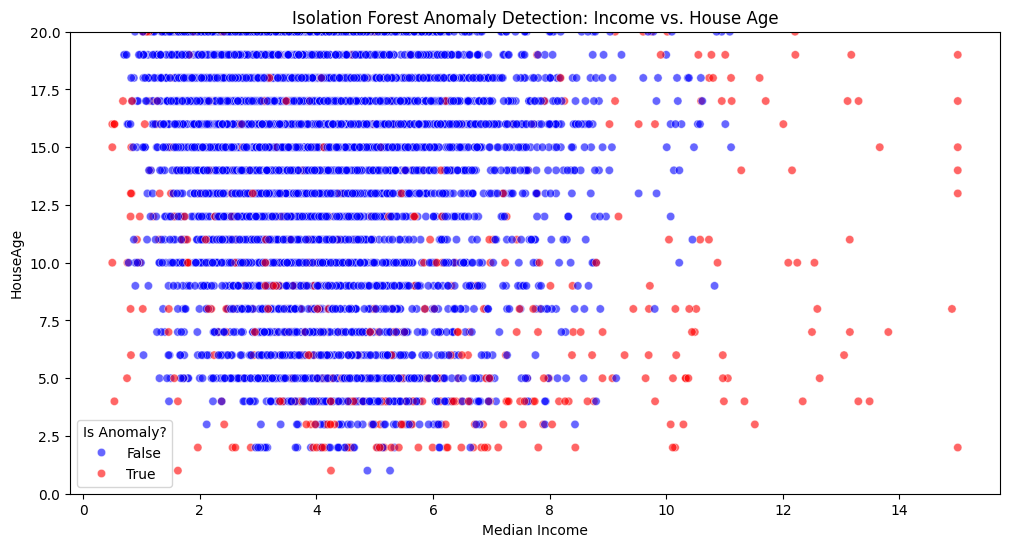

In [26]:
plt.figure(figsize=(12, 6))

# Plot points flagged by Isolation Forest
sns.scatterplot(
    data=df,
    x='MedInc',
    y='HouseAge',
    hue='outlier_iso',
    palette={True: 'red', False: 'blue'},
    alpha=0.6
)

plt.title("Isolation Forest Anomaly Detection: Income vs. House Age")
plt.xlabel("Median Income")
plt.ylabel("HouseAge")
plt.ylim(0, 20) # Zoom in to ignore extreme errors
plt.legend(title='Is Anomaly?')
plt.show()

In [27]:
# there is not a clear trend here

In [28]:
'''Claude Prompt:
"I have a DataFrame 'df' with a boolean column 'outlier_iso' (True if outlier, False if normal).
I need to generate a **Comparative Forensics Report** using Python/Pandas.

**Tasks:**
1. Split the data into two DataFrames: `df_normal` and `df_outlier`.
2. Calculate the **Mean** and **Median** for 'MedInc' (Income) and 'MedHouseVal' (Value) for both groups.
3. Calculate the **Standard Deviation** vs **MAD** (Median Absolute Deviation) to measure volatility in both groups.
4. Print a summary table showing the 'Inequality Wedge' (Mean - Median) for the outliers.

**Visualization:**
* Create a 1x2 subplot.
* Left: Histogram of 'MedInc' for Normal points (Blue).
* Right: Histogram of 'MedInc' for Outliers (Red).
* Title: 'The Pareto World: Core Market vs. The Tail'."'''

'Claude Prompt:\n"I have a DataFrame \'df\' with a boolean column \'outlier_iso\' (True if outlier, False if normal).\nI need to generate a **Comparative Forensics Report** using Python/Pandas.\n\n**Tasks:**\n1. Split the data into two DataFrames: `df_normal` and `df_outlier`.\n2. Calculate the **Mean** and **Median** for \'MedInc\' (Income) and \'MedHouseVal\' (Value) for both groups.\n3. Calculate the **Standard Deviation** vs **MAD** (Median Absolute Deviation) to measure volatility in both groups.\n4. Print a summary table showing the \'Inequality Wedge\' (Mean - Median) for the outliers.\n\n**Visualization:**\n* Create a 1x2 subplot.\n* Left: Histogram of \'MedInc\' for Normal points (Blue).\n* Right: Histogram of \'MedInc\' for Outliers (Red).\n* Title: \'The Pareto World: Core Market vs. The Tail\'."'

COMPARATIVE FORENSICS REPORT: Normal vs Outlier Analysis

📊 Sample Sizes:
   Normal Points:  19,608 (95.0%)
   Outlier Points: 1,032 (5.0%)

TASK 2: Central Tendency Comparison (Mean vs Median)
               Metric     Mean  Median
      MedInc (Normal) 3.769613 3.51560
     MedInc (Outlier) 5.790782 4.25695
 MedHouseVal (Normal) 2.037000 1.78900
MedHouseVal (Outlier) 2.668172 2.05700

TASK 3: Volatility Comparison (Std Dev vs MAD)
               Metric  Std Dev     MAD  Std/MAD Ratio
      MedInc (Normal) 1.640561 1.03165       1.590230
     MedInc (Outlier) 4.145354 2.49190       1.663531
 MedHouseVal (Normal) 1.114117 0.67400       1.652992
MedHouseVal (Outlier) 1.634770 1.10300       1.482113

TASK 4: Inequality Wedge Analysis (Outlier Group)
The 'Inequality Wedge' = Mean - Median
Positive wedge → Right-skewed (high-value tail pulling mean up)

   Variable  Mean (Outlier)  Median (Outlier)  Inequality Wedge   Wedge %
     MedInc        5.790782           4.25695          1.533832 

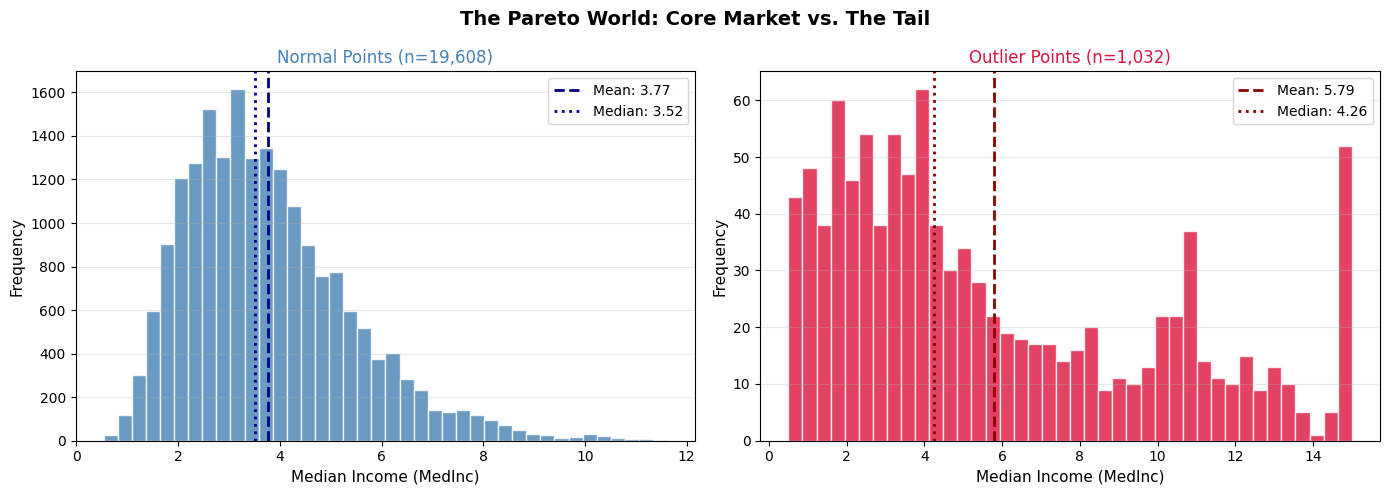


KEY FORENSIC INSIGHTS
1. Outliers show higher average income (5.79 vs 3.77)
2. Income volatility (Std Dev) is 2.5x higher in outliers
3. Inequality Wedge for outlier income: 1.534 (36.0% of median)


In [29]:
from scipy import stats

# Assuming 'df' exists with 'outlier_iso', 'MedInc', and 'MedHouseVal' columns
# If you need sample data for testing, uncomment below:
# from sklearn.datasets import fetch_california_housing
# from sklearn.ensemble import IsolationForest
# housing = fetch_california_housing(as_frame=True)
# df = housing.frame[['MedInc', 'MedHouseVal']]
# iso = IsolationForest(contamination=0.1, random_state=42)
# df['outlier_iso'] = iso.fit_predict(df) == -1

# =============================================================================
# TASK 1: Split Data into Normal and Outlier DataFrames
# =============================================================================
df_normal = df[df['outlier_iso'] == False].copy()
df_outlier = df[df['outlier_iso'] == True].copy()

print("=" * 70)
print("COMPARATIVE FORENSICS REPORT: Normal vs Outlier Analysis")
print("=" * 70)
print(f"\n📊 Sample Sizes:")
print(f"   Normal Points:  {len(df_normal):,} ({len(df_normal)/len(df)*100:.1f}%)")
print(f"   Outlier Points: {len(df_outlier):,} ({len(df_outlier)/len(df)*100:.1f}%)")

# =============================================================================
# TASK 2: Calculate Mean and Median for Both Groups
# =============================================================================
def calc_stats(data, col):
    return {
        'Mean': data[col].mean(),
        'Median': data[col].median()
    }

# Income Statistics
income_normal = calc_stats(df_normal, 'MedInc')
income_outlier = calc_stats(df_outlier, 'MedInc')

# House Value Statistics
value_normal = calc_stats(df_normal, 'MedHouseVal')
value_outlier = calc_stats(df_outlier, 'MedHouseVal')

print("\n" + "=" * 70)
print("TASK 2: Central Tendency Comparison (Mean vs Median)")
print("=" * 70)

summary_central = pd.DataFrame({
    'Metric': ['MedInc (Normal)', 'MedInc (Outlier)',
               'MedHouseVal (Normal)', 'MedHouseVal (Outlier)'],
    'Mean': [income_normal['Mean'], income_outlier['Mean'],
             value_normal['Mean'], value_outlier['Mean']],
    'Median': [income_normal['Median'], income_outlier['Median'],
               value_normal['Median'], value_outlier['Median']]
})
print(summary_central.to_string(index=False))

# =============================================================================
# TASK 3: Standard Deviation vs MAD (Volatility Measures)
# =============================================================================
def calc_volatility(data, col):
    return {
        'Std Dev': data[col].std(),
        'MAD': stats.median_abs_deviation(data[col], scale=1)
    }

vol_income_normal = calc_volatility(df_normal, 'MedInc')
vol_income_outlier = calc_volatility(df_outlier, 'MedInc')
vol_value_normal = calc_volatility(df_normal, 'MedHouseVal')
vol_value_outlier = calc_volatility(df_outlier, 'MedHouseVal')

print("\n" + "=" * 70)
print("TASK 3: Volatility Comparison (Std Dev vs MAD)")
print("=" * 70)

summary_vol = pd.DataFrame({
    'Metric': ['MedInc (Normal)', 'MedInc (Outlier)',
               'MedHouseVal (Normal)', 'MedHouseVal (Outlier)'],
    'Std Dev': [vol_income_normal['Std Dev'], vol_income_outlier['Std Dev'],
                vol_value_normal['Std Dev'], vol_value_outlier['Std Dev']],
    'MAD': [vol_income_normal['MAD'], vol_income_outlier['MAD'],
            vol_value_normal['MAD'], vol_value_outlier['MAD']],
    'Std/MAD Ratio': [vol_income_normal['Std Dev']/vol_income_normal['MAD'],
                      vol_income_outlier['Std Dev']/vol_income_outlier['MAD'],
                      vol_value_normal['Std Dev']/vol_value_normal['MAD'],
                      vol_value_outlier['Std Dev']/vol_value_outlier['MAD']]
})
print(summary_vol.to_string(index=False))

# =============================================================================
# TASK 4: Inequality Wedge Summary (Mean - Median) for Outliers
# =============================================================================
print("\n" + "=" * 70)
print("TASK 4: Inequality Wedge Analysis (Outlier Group)")
print("=" * 70)
print("The 'Inequality Wedge' = Mean - Median")
print("Positive wedge → Right-skewed (high-value tail pulling mean up)\n")

inequality_wedge = pd.DataFrame({
    'Variable': ['MedInc', 'MedHouseVal'],
    'Mean (Outlier)': [income_outlier['Mean'], value_outlier['Mean']],
    'Median (Outlier)': [income_outlier['Median'], value_outlier['Median']],
    'Inequality Wedge': [income_outlier['Mean'] - income_outlier['Median'],
                         value_outlier['Mean'] - value_outlier['Median']],
    'Wedge %': [(income_outlier['Mean'] - income_outlier['Median'])/income_outlier['Median']*100,
                (value_outlier['Mean'] - value_outlier['Median'])/value_outlier['Median']*100]
})
print(inequality_wedge.to_string(index=False))

# =============================================================================
# VISUALIZATION: The Pareto World - Core Market vs The Tail
# =============================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("The Pareto World: Core Market vs. The Tail", fontsize=14, fontweight='bold')

# Left: Normal Distribution (Blue)
axes[0].hist(df_normal['MedInc'], bins=40, color='steelblue', edgecolor='white', alpha=0.8)
axes[0].axvline(income_normal['Mean'], color='navy', linestyle='--', lw=2, label=f"Mean: {income_normal['Mean']:.2f}")
axes[0].axvline(income_normal['Median'], color='darkblue', linestyle=':', lw=2, label=f"Median: {income_normal['Median']:.2f}")
axes[0].set_xlabel('Median Income (MedInc)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title(f'Normal Points (n={len(df_normal):,})', fontsize=12, color='steelblue')
axes[0].legend(loc='upper right')
axes[0].grid(axis='y', alpha=0.3)

# Right: Outlier Distribution (Red)
axes[1].hist(df_outlier['MedInc'], bins=40, color='crimson', edgecolor='white', alpha=0.8)
axes[1].axvline(income_outlier['Mean'], color='darkred', linestyle='--', lw=2, label=f"Mean: {income_outlier['Mean']:.2f}")
axes[1].axvline(income_outlier['Median'], color='maroon', linestyle=':', lw=2, label=f"Median: {income_outlier['Median']:.2f}")
axes[1].set_xlabel('Median Income (MedInc)', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title(f'Outlier Points (n={len(df_outlier):,})', fontsize=12, color='crimson')
axes[1].legend(loc='upper right')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# FINAL INSIGHTS
# =============================================================================
print("\n" + "=" * 70)
print("KEY FORENSIC INSIGHTS")
print("=" * 70)
print(f"1. Outliers show {'higher' if income_outlier['Mean'] > income_normal['Mean'] else 'lower'} "
      f"average income ({income_outlier['Mean']:.2f} vs {income_normal['Mean']:.2f})")
print(f"2. Income volatility (Std Dev) is {vol_income_outlier['Std Dev']/vol_income_normal['Std Dev']:.1f}x "
      f"higher in outliers")
print(f"3. Inequality Wedge for outlier income: {income_outlier['Mean'] - income_outlier['Median']:.3f} "
      f"({(income_outlier['Mean'] - income_outlier['Median'])/income_outlier['Median']*100:.1f}% of median)")